# Simulating Power Spectra

In this notebook we will explore how to simulate the data that we will use to investigate how different spectral parameters can influence band ratios. 

Simulated power spectra will be created with varying aperiodic and periodic parameters, and are created using the [FOOOF](https://github.com/fooof-tools/fooof) tool.

In the first set of simulations, each set of simulated spectra will vary across a single parameter while the remaining parameters remain constant. In a secondary set of simulated power spectra, we will simulate pairs of parameters changing together.

For this part of the project, this notebook demonstrates the simulations with some examples, but does not create the actual set simulations used in the project. The full set of simulations for the project are created by the standalone scripts, available in the `scripts` folder. 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from fooof.sim import *
from fooof.plts import plot_spectra

In [2]:
# Import custom project code
import sys
sys.path.append('../bratios')
from settings import *
from paths import DATA_PATHS as dp

In [3]:
# Settings
FREQ_RANGE = [1, 40]
LO_BAND = [4, 8]
HI_BAND = [13, 30]

# Define default parameters
EXP_DEF = [0, 1]
CF_LO_DEF = np.mean(LO_BAND)
CF_HI_DEF = np.mean(HI_BAND)
PW_DEF = 0.4
BW_DEF = 1

# Set a range of values for the band power to take
PW_START = 0
PW_END = 1
W_INC = .1

# Set a range of values for the aperiodic exponent to take
EXP_START = .25
EXP_END = 3
EXP_INC = .25

## Simulate power spectra with one parameter varying

First we will make several power spectra with varying band power. 

To do so, we will continue to use the example of the theta beta ratio, and vary the power of the higher (beta) band.

In [4]:
# The Stepper object iterates through a range of values
pw_step = Stepper(PW_START, PW_END, PW_INC)
num_spectra = len(pw_step)

# `param_iter` creates a generator can be used to step across ranges of parameters
pw_iter = param_iter([[CF_LO_DEF, PW_DEF, BW_DEF], [CF_HI_DEF, pw_step, BW_DEF]])

In [5]:
# Simulate power spectra
pw_fs, pw_ps, pw_syns = gen_group_power_spectra(num_spectra, FREQ_RANGE, EXP_DEF, pw_iter)

# Collect together simulated data
pw_data = [pw_fs, pw_ps, pw_syns]

# Save out data, to access from other notebooks
np.save(dp.make_file_path(dp.demo, 'PW_DEMO', 'npy'), pw_data)

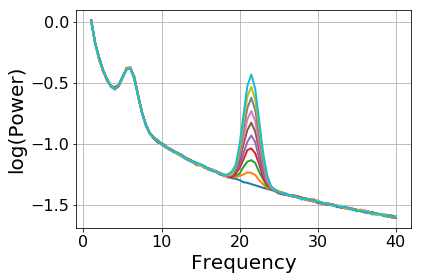

In [6]:
# Plot our series of generated power spectra, with varying high-band power
plot_spectra(pw_fs, pw_ps, log_powers=True)

Above, we can see each of the spectra we generated plotted, with the same properties for all parameters, except for beta power.

The same approach can be used to simulate data that vary only in one parameter, for each isolated spectral feature.

## Simulate power spectra with two parameters varying

In this section we will explore generating data in which two parameters vary simultaneously.

Specifically, we will simulate the case in which the aperiodic exponent varies while power for a higher band oscillation also varies.

The total number of trials will be: `(n_pw_changes) * (n_exp_changes)`.

In [7]:
data = []

exp_step = Stepper(EXP_START, EXP_END, EXP_INC)
for exp in exp_step:
        
    # Low band sweeps through power range
    pw_step = Stepper(PW_START, PW_END, PW_INC)
    pw_iter = param_iter([[CF_LO_DEF, PW_DEF, BW_DEF],
                          [CF_HIGH_DEF, pw_step, BW_DEF]])
    
    # Generates data
    pw_apc_fs, pw_apc_ps, pw_apc_syns = gen_group_power_spectra(
        len(pw_step), FREQ_RANGE, [0, exp], pw_iter)
    
    # Collect together all simulated data
    data.append(np.array([exp, pw_apc_fs, pw_apc_ps], dtype=object))

# Save out data, to access from other notebooks
np.save(dp.make_file_path(dp.demo, 'EXP_PW_DEMO', 'npy'), data)

In [8]:
# Extract some example power spectra, sub-sampling ones that vary in both exp & power
#   Note: this is just a shortcut to step across the diagonal of the matrix of simulated spectra
plot_psds = [data[ii][2][ii, :] for ii in range(min(len(exp_step), len(pw_step)))]

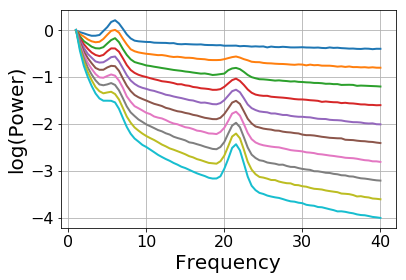

In [9]:
# Plot a selection of power spectra in the paired parameter simulations
plot_spectra(pw_apc_fs, plot_psds, log_powers=True)

In the plot above, we can see a selection of the data we just simulated, selecting a group of power spectra that vary across both exponent and beta power.

In the next notebook we will calculate band ratios and see how changing these parameters affects ratio measures.

### Simulating the full set of data

Here we just simulated example data, to show how the simulations work. 

The full set of simulations for this project are re-created with scripts, available in the `scripts` folder.

To simulate full set of single parameter simulation for this project, run this script:

`python gen_single_param_sims.py`

To simulate full set of interacting parameter simulation for this project, run this script:

`python gen_interacting_param_sims.py`

These scripts will automatically save all the regenerated data into the `data` folder.  

In [10]:
# Check all the available data files for the single parameter simulations
dp.list_files('sims_single')

Files in the sims_single directory:
     1f_data.npy
     bw_alpha.npy
     bw_beta.npy
     bw_theta.npy
     cf_alpha.npy
     cf_beta.npy
     cf_theta.npy
     exp_data.npy
     offset_data.npy
     pw_alpha.npy
     pw_beta.npy
     pw_theta.npy
     shifting_alpha.npy


In [11]:
# Check all the available data files for the interacting parameter simulations
dp.list_files('sims_interacting')

Files in the sims_interacting directory:
     EXP_highBW.npy
     EXP_highCF.npy
     EXP_highPW.npy
     EXP_lowBW.npy
     EXP_lowCF.npy
     EXP_lowPW.npy
     highCF_highBW.npy
     highCF_highPW.npy
     highCF_lowBW.npy
     highCF_lowPW.npy
     highPW_highBW.npy
     highPW_lowBW.npy
     lowBW_highBW.npy
     lowCF_highBW.npy
     lowCF_highCF.npy
     lowCF_highPW.npy
     lowCF_lowBW.npy
     lowCF_lowPW.npy
     lowPW_highBW.npy
     lowPW_highPW.npy
     lowPW_lowBW.npy
